# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

The packages required to run the code are imported in the notebook. These include:
- Yfinance: to pull data from Yahoo Finance
- Pandas and Numpy: to manipulate data 
- Os and Datetime: to save files and access directories 
- Re: regular expressions [REMOVE]
- Matplotlib: to plot the data 

In [1]:
# import libraries 
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import re 

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/. Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html

### Get_data()

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 


In [2]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [3]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 
def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [4]:
# execute the function 
get_data(tickers)

[*********************100%***********************]  5 of 5 completed


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The output is a table, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a table where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In this section, the most recent data saved is plotted. 

The package *os* is used to find the most recent file in the data folder, based on the timestamp in the name. 


In [5]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

The most recent data downloaded from Yahoo Finance and saved to a .csv file is opened as a Pandas dataframe. Pandas allows to read different types of strucutred data (including tabular data and json data), manipulate and plot it. 

The import is set as followed: 
- the first 2 rows of the data are set as headers (the first row identifies the stock data points, the second each stock),
- the first column (datetime) is set as Index: this means that the date is the index (or identifier) of each row and can be used to identify rows. 
- the index (datetime) is read and imported not as object (string) but as datetime. This is required to capture tha data as a date/time, and perform calculations like resampling or rolling, if required.  (see: https://pandas.pydata.org/docs/user_guide/timeseries.html#overview). 

In [20]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1], index_col=0, parse_dates=True)

# preview data 
df_latest_tickers.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-04 14:30:00+00:00  281.225006  228.774994  317.510010  665.729980   
2025-12-04 15:30:00+00:00  280.279999  227.899994  316.809998  664.849976   
2025-12-04 16:30:00+00:00  280.114990  227.169998  317.065002  668.190002   
2025-12-04 17:30:00+00:00  280.005005  228.300003  317.684998  664.765015   
2025-12-04 18:30:00+00:00  278.859985  228.309998  317.281006  662.799927   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-12-04 14:30:00+00:00  102.540001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 15:30:00+00:00  102.120003       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 16:30:00+00:00  102.279999       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 17:30:00+00:00  102.968903       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 18:30:00+00:00  103.065002       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits                       Volume           \
Ticker                            AAPL AMZN GOOG META NFLX     AAPL     AMZN   
Datetime                                                                       
2025-12-04 14:30:00+00:00          0.0  0.0  0.0  0.0  0.0  6410843  7888562   
2025-12-04 15:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2986361  6415080   
2025-12-04 16:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2285394  3404612   
2025-12-04 17:30:00+00:00          0.0  0.0  0.0  0.0  0.0  1806229  2964488   
2025-12-04 18:30:00+00:00          0.0  0.0  0.0  0.0  0.0  2574486  2892836   

Price                                                  
Ticker                        GOOG      META     NFLX  
Datetime                                               
2025-12-04 14:30:00+00:00  4390383  10059794  9053564  
2025-12-04 15:30:00+00:00  1177250   2532344  5711567  
2025-12-04 16:30:00+00:00  1003034   1608145  4164476  
2025-12-04 17:30:00+00:00   882040   1307691  3153877  
2025-12-04 18:30:00+00:00   805792    879092  2575441  

[5 rows x 35 columns]

Headers explored to know more about the columns (or series). 

In [7]:
# list colums 
headers = list(df_latest_tickers)

headers

[('Close', 'AAPL'),
 ('Close', 'AMZN'),
 ('Close', 'GOOG'),
 ('Close', 'META'),
 ('Close', 'NFLX'),
 ('Dividends', 'AAPL'),
 ('Dividends', 'AMZN'),
 ('Dividends', 'GOOG'),
 ('Dividends', 'META'),
 ('Dividends', 'NFLX'),
 ('High', 'AAPL'),
 ('High', 'AMZN'),
 ('High', 'GOOG'),
 ('High', 'META'),
 ('High', 'NFLX'),
 ('Low', 'AAPL'),
 ('Low', 'AMZN'),
 ('Low', 'GOOG'),
 ('Low', 'META'),
 ('Low', 'NFLX'),
 ('Open', 'AAPL'),
 ('Open', 'AMZN'),
 ('Open', 'GOOG'),
 ('Open', 'META'),
 ('Open', 'NFLX'),
 ('Stock Splits', 'AAPL'),
 ('Stock Splits', 'AMZN'),
 ('Stock Splits', 'GOOG'),
 ('Stock Splits', 'META'),
 ('Stock Splits', 'NFLX'),
 ('Volume', 'AAPL'),
 ('Volume', 'AMZN'),
 ('Volume', 'GOOG'),
 ('Volume', 'META'),
 ('Volume', 'NFLX')]

In [21]:
# Create a new "Date" column to modify datetime format
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime columns to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers.index.astype(str).str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns
df_latest_tickers.head(6)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-04 14:30:00+00:00  281.225006  228.774994  317.510010  665.729980   
2025-12-04 15:30:00+00:00  280.279999  227.899994  316.809998  664.849976   
2025-12-04 16:30:00+00:00  280.114990  227.169998  317.065002  668.190002   
2025-12-04 17:30:00+00:00  280.005005  228.300003  317.684998  664.765015   
2025-12-04 18:30:00+00:00  278.859985  228.309998  317.281006  662.799927   
2025-12-04 19:30:00+00:00  280.125000  228.708206  317.994995  660.634399   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-12-04 14:30:00+00:00  102.540001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 15:30:00+00:00  102.120003       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 16:30:00+00:00  102.279999       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 17:30:00+00:00  102.968903       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 18:30:00+00:00  103.065002       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-04 19:30:00+00:00  103.419800       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-04 14:30:00+00:00          0.0  0.0  0.0  6410843  7888562  4390383   
2025-12-04 15:30:00+00:00          0.0  0.0  0.0  2986361  6415080  1177250   
2025-12-04 16:30:00+00:00          0.0  0.0  0.0  2285394  3404612  1003034   
2025-12-04 17:30:00+00:00          0.0  0.0  0.0  1806229  2964488   882040   
2025-12-04 18:30:00+00:00          0.0  0.0  0.0  2574486  2892836   805792   
2025-12-04 19:30:00+00:00          0.0  0.0  0.0  2807996  2591626   912064   

Price                                                     Date  \
Ticker                         META     NFLX                     
Datetime                                                         
2025-12-04 14:30:00+00:00  10059794  9053564  2025-12-04 14:30   
2025-12-04 15:30:00+00:00   2532344  5711567  2025-12-04 15:30   
2025-12-04 16:30:00+00:00   1608145  4164476  2025-12-04 16:30   
2025-12-04 17:30:00+00:00   1307691  3153877  2025-12-04 17:30   
2025-12-04 18:30:00+00:00    879092  2575441  2025-12-04 18:30   
2025-12-04 19:30:00+00:00   1141839  2127964  2025-12-04 19:30   

Price                        Close_datetime  
Ticker                                       
Datetime                                     
2025-12-04 14:30:00+00:00                    
2025-12-04 15:30:00+00:00                    
2025-12-04 16:30:00+00:00                    
2025-12-04 17:30:00+00:00                    
2025-12-04 18:30:00+00:00                    
2025-12-04 19:30:00+00:00  2025-12-04 19:30  

[6 rows x 37 columns]

In [18]:
# create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

eod_tickers.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-04 19:30:00+00:00  280.125000  228.708206  317.994995  660.634399   
2025-12-05 19:30:00+00:00  278.801392  229.259995  321.040009  672.710022   
2025-12-08 19:30:00+00:00  276.924988  226.974197  313.269989  668.210022   
2025-12-09 19:30:00+00:00  277.864990  227.914993  317.920013  656.349976   
2025-12-10 19:30:00+00:00  278.980011  231.919998  320.510010  647.919983   

Price                                 Dividends                      ...  \
Ticker                           NFLX      AAPL AMZN GOOG META NFLX  ...   
Datetime                                                             ...   
2025-12-04 19:30:00+00:00  103.419800       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-05 19:30:00+00:00  100.610001       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-08 19:30:00+00:00   96.959999       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-09 19:30:00+00:00   96.849998       0.0  0.0  0.0  0.0  0.0  ...   
2025-12-10 19:30:00+00:00   93.409897       0.0  0.0  0.0  0.0  0.0  ...   

Price                     Stock Splits             Volume                    \
Ticker                            GOOG META NFLX     AAPL     AMZN     GOOG   
Datetime                                                                      
2025-12-04 19:30:00+00:00          0.0  0.0  0.0  2807996  2591626   912064   
2025-12-05 19:30:00+00:00          0.0  0.0  0.0  1937238  1444485   632008   
2025-12-08 19:30:00+00:00          0.0  0.0  0.0  2861661  1794666  1012658   
2025-12-09 19:30:00+00:00          0.0  0.0  0.0  1906538  1275552   764080   
2025-12-10 19:30:00+00:00          0.0  0.0  0.0  2578278  3311589  1555562   

Price                                              Date    Close_datetime  
Ticker                        META     NFLX                                
Datetime                                                                   
2025-12-04 19:30:00+00:00  1141839  2127964  2025-12-04  2025-12-04 19:30  
2025-12-05 19:30:00+00:00  1111957  8070497  2025-12-05  2025-12-05 19:30  
2025-12-08 19:30:00+00:00   483116  7141535  2025-12-08  2025-12-08 19:30  
2025-12-09 19:30:00+00:00   595350  3500625  2025-12-09  2025-12-09 19:30  
2025-12-10 19:30:00+00:00  1545291  7418112  2025-12-10  2025-12-10 19:30  

[5 rows x 37 columns]

In [54]:
# plot hourly close price 

def plot_close_price(date, close_price):

    fig, ax = plt.subplots(figsize = (16,16))
    ax.plot(date, close_price)
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Close Price (USD)')
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
    ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-large', loc = "center right")
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
    ax.set_xticks(date, labels = date, rotation = 90) 

    ax.set_title('FAANG Stocks - Close price over last 5 days')

    # show plot 
    

    # save plot 
    image_name = latest_tickers_data.strip('.csv') + '.png'
    plt.savefig("images/"+ image_name, dpi=100)

    plt.show()

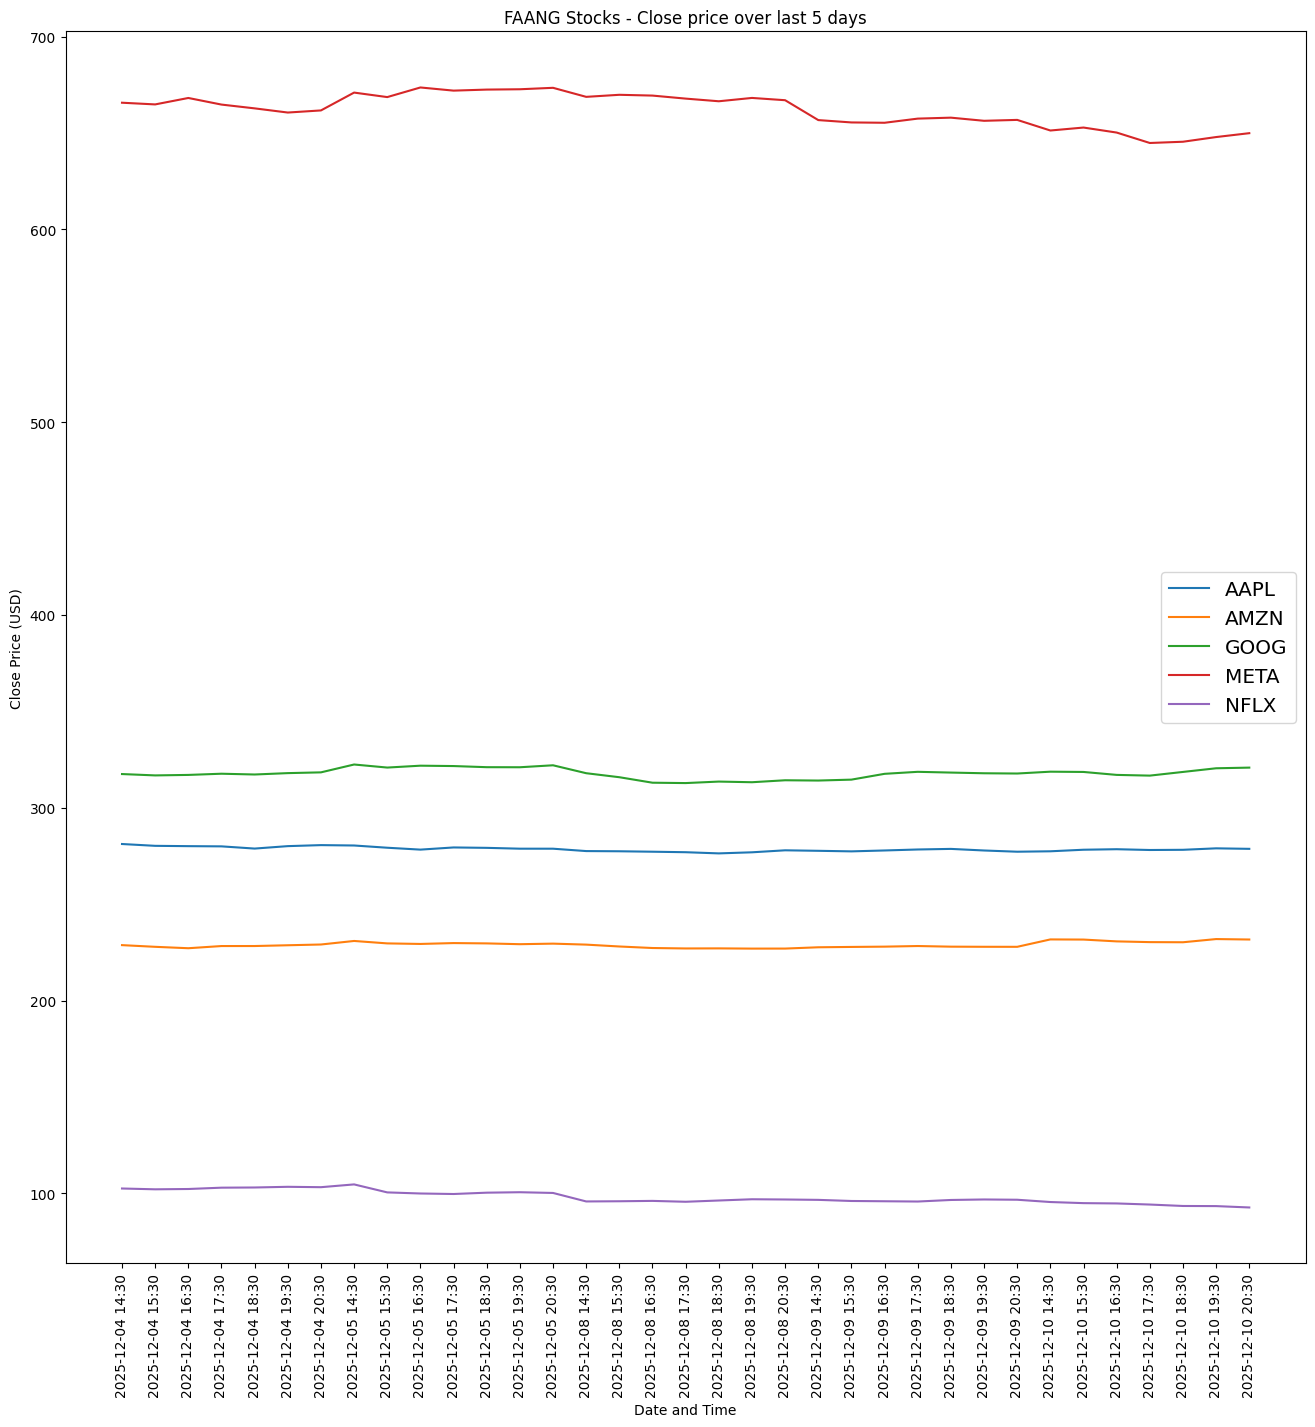

In [55]:
# get subset for closing prices 
close_price = df_latest_tickers['Close']
# get index (date and time)
date = df_latest_tickers['Date']

# execute the function 
plot_close_price(df_latest_tickers['Date'], df_latest_tickers['Close'])

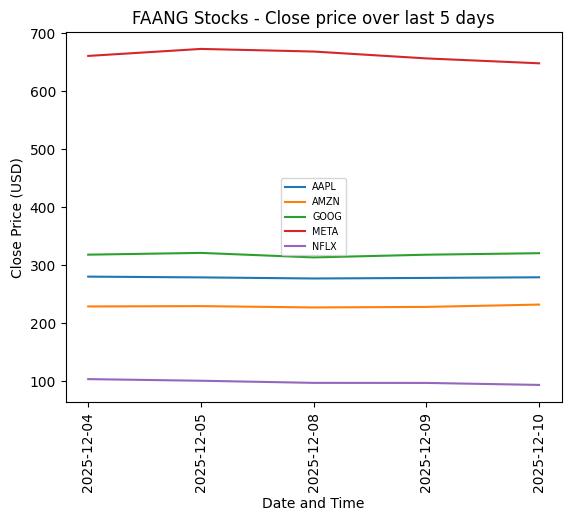

In [22]:
# [REMOVE]
# Plot EOD close price 

# get subset for closing prices 
close_price = eod_tickers['Close']
# get index (date and time)
eod_date = eod_tickers['Date']

fig, ax = plt.subplots()
ax.plot(eod_date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')

plt.show()

In [13]:
# Plot EOD close price in subplots 

# See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 
# To add: percentage variation in value at EOD close price

# Create arrays for variables
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

data = [aapl, amzn, goog, meta, nflx]
titles = ['AAPL', 'AMZN', 'GOOG', 'META', 'NFLX']


In [14]:

# Function to plot the data 

def plot_close_price_subplots(data, titles):
# Put data and titles in lists for easy looping

    # Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
    fig, axs = plt.subplots(2, 3, figsize=(14, 8))

    # Flatten the 2D array of axes for easy iteration
    axs = axs.flatten()

    # Plot each stock
    for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
        ax.plot(eod_date, series)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=90)

    # Hide the last unused subplot (the 6th one)
    axs[-1].set_visible(False)

    # Adjust spacing between plots
    fig.tight_layout(pad=3.0)

    # save image 
    image_name = latest_tickers_data.strip('.csv') + '_subplots.png'
    plt.savefig("images/"+ image_name)

    
    plt.show()

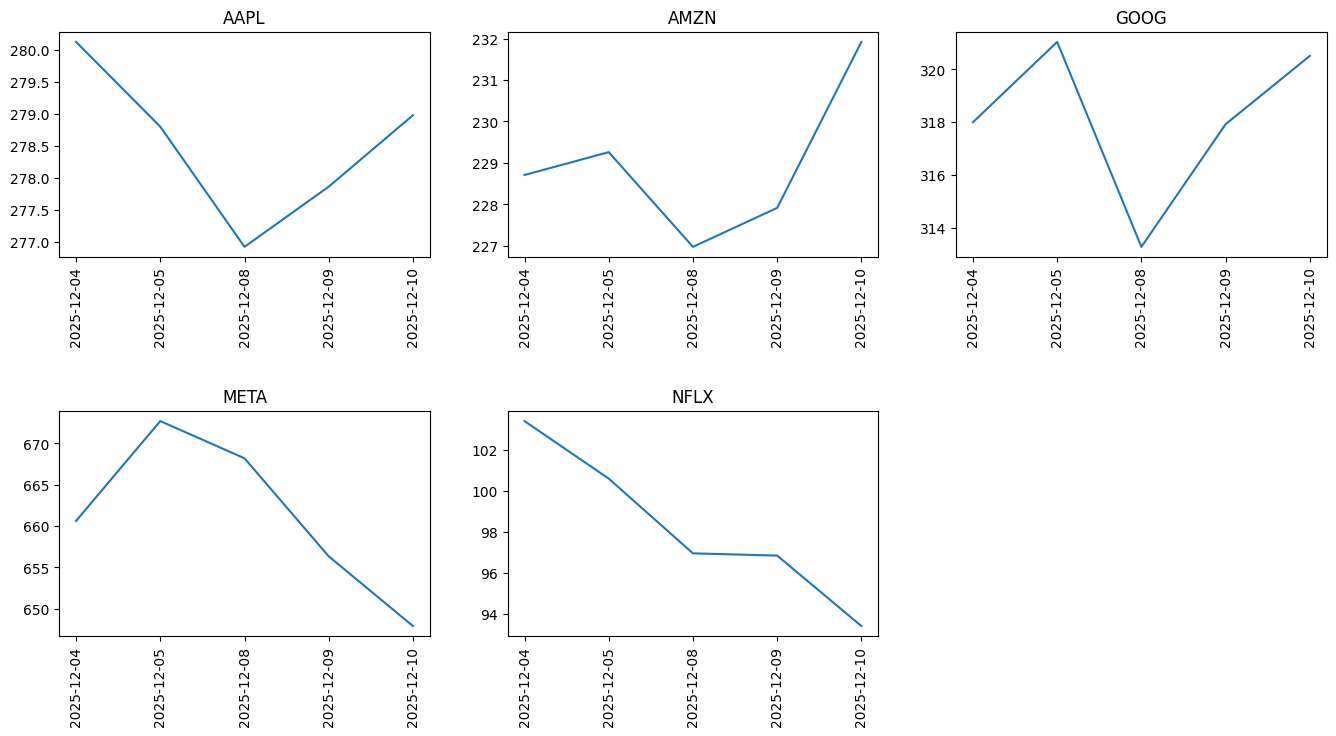

In [15]:
plot_close_price_subplots(data, titles)

## Problem 3: Script 

The code created above is added to the python file faang.py. The goal of the script to to create an


Steps: 
- add the code to a python file in the root node of the repo 
- add shebang line 
- give to current user execute permission (normally it's only read write) eith chmod u+x faang.py
- test the code 
